In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
!gdown 1L8843A80r50_e-hU79XV_ssAfzgQVUDP

Downloading...
From: https://drive.google.com/uc?id=1L8843A80r50_e-hU79XV_ssAfzgQVUDP
To: /content/test case data analyst.xlsx
100% 3.28M/3.28M [00:00<00:00, 161MB/s]


In [34]:
df = pd.read_excel('/content/test case data analyst.xlsx')

In [35]:
df.head()

,product_id,quantity,is_trial_period,purchase_date,user_id
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991
3,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,9455582
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,8803657


In [36]:
df.dtypes

product_id                 object
quantity                    int64
is_trial_period              bool
purchase_date      datetime64[ns]
user_id                     int64
dtype: object

In [37]:
df.isna().mean()

product_id         0.0
quantity           0.0
is_trial_period    0.0
purchase_date      0.0
user_id            0.0
dtype: float64

In [38]:
df[df['product_id'] != '1week_4.99_USD_subscription_7days_trial']

,product_id,quantity,is_trial_period,purchase_date,user_id


In [39]:
df[df['quantity'] != 1]

,product_id,quantity,is_trial_period,purchase_date,user_id


In [40]:
df.purchase_date.min()

Timestamp('2020-01-01 00:00:00')

In [41]:
df.purchase_date.max()

Timestamp('2020-02-20 00:00:00')

In [42]:
df = df.sort_values(by='purchase_date', ignore_index=True)

In [43]:
df['user_action_count'] = df.groupby('user_id').cumcount() + 1

In [44]:
df[df['user_action_count'] == 1].query('is_trial_period != True')

,product_id,quantity,is_trial_period,purchase_date,user_id,user_action_count
505,1week_4.99_USD_subscription_7days_trial,1,False,2020-01-01,1511831,1
1395,1week_4.99_USD_subscription_7days_trial,1,False,2020-01-02,7293651,1
2100,1week_4.99_USD_subscription_7days_trial,1,False,2020-01-02,7843318,1
3074,1week_4.99_USD_subscription_7days_trial,1,False,2020-01-03,7591159,1
3799,1week_4.99_USD_subscription_7days_trial,1,False,2020-01-04,7204327,1
8104,1week_4.99_USD_subscription_7days_trial,1,False,2020-01-07,2555928,1
8594,1week_4.99_USD_subscription_7days_trial,1,False,2020-01-07,8426953,1


In [45]:
df[df['user_id'] == 7591159]

,product_id,quantity,is_trial_period,purchase_date,user_id,user_action_count
3074,1week_4.99_USD_subscription_7days_trial,1,False,2020-01-03,7591159,1
13849,1week_4.99_USD_subscription_7days_trial,1,False,2020-01-10,7591159,2
63722,1week_4.99_USD_subscription_7days_trial,1,True,2020-02-02,7591159,3
86550,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-11,7591159,4
112856,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,7591159,5


7 users appear to have their trial period not on their first week, should be checked for an error

In [46]:
duplicates = df.groupby(['user_id', 'purchase_date']).agg({'quantity':'sum'})

In [47]:
duplicates[duplicates['quantity'] > 1].sort_values(by='quantity', ascending=False)

,,quantity
user_id,purchase_date,
9584301,2020-02-16,7
8577778,2020-01-12,3
8928229,2020-01-23,3
8671902,2020-01-22,3
8752195,2020-01-18,3
...,...,...
8882691,2020-01-22,2
1639577,2020-01-10,2
8955671,2020-01-24,2


In [48]:
df[df['user_id'] == 9584301]

,product_id,quantity,is_trial_period,purchase_date,user_id,user_action_count
60011,1week_4.99_USD_subscription_7days_trial,1,True,2020-02-01,9584301,1
79739,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-08,9584301,2
101131,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-15,9584301,3
101618,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,9584301,4
102245,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,9584301,5
102331,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,9584301,6
102795,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,9584301,7
103233,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,9584301,8
103326,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,9584301,9
103425,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,9584301,10


In [49]:
duplicates.query('quantity > 1').sum()

quantity    155
dtype: int64

155 rows are duplicates by user_id and date, volume is negligible within the scope of analysis, but should be checked for an error

In [50]:
daily_new_users = df.query('user_action_count == 1').groupby('purchase_date', as_index=False).agg({'quantity': 'sum'})

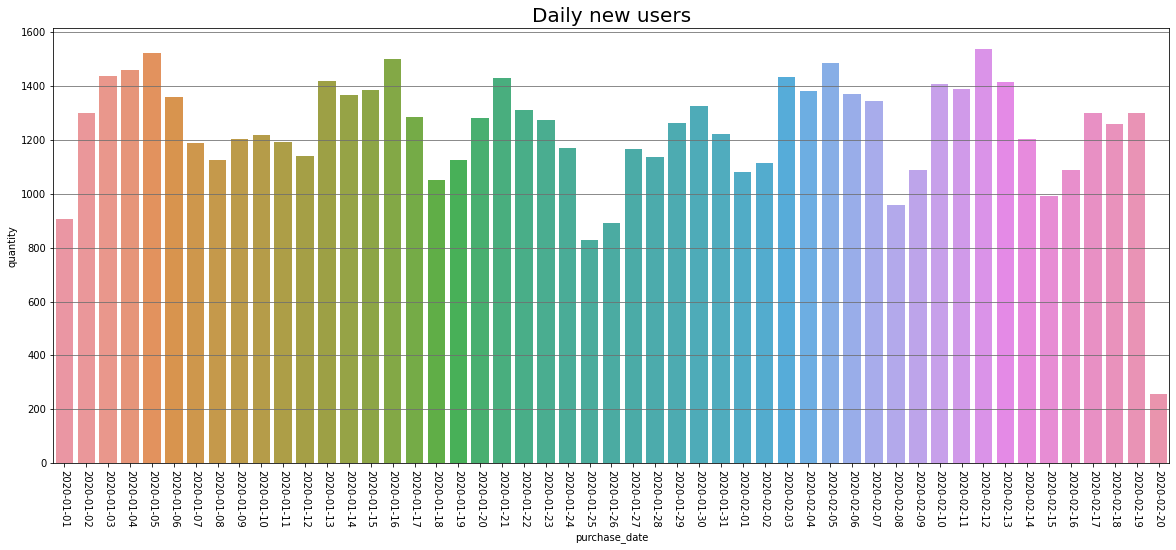

In [51]:
sns.barplot(data=daily_new_users, x=pd.to_datetime(daily_new_users['purchase_date']).dt.date, y='quantity')
plt.xticks(rotation=-90)
plt.title('Daily new users', fontsize=20)
plt.gcf().set_size_inches(20, 8, forward=True)
plt.grid(axis='y', color='#6f6f6f')

In [52]:
sub_price = 4.99
df['revenue'] = sub_price * ~df['is_trial_period']

In [53]:
revenue = df.groupby('purchase_date', as_index=False).agg({'revenue': 'sum'})

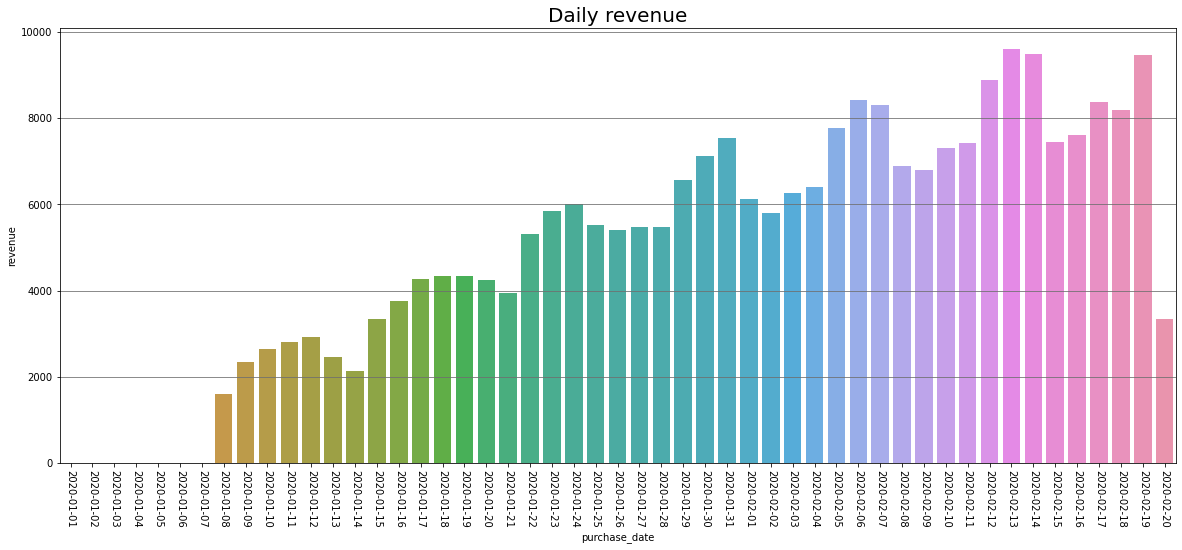

In [54]:
sns.barplot(data=revenue, x=pd.to_datetime(revenue['purchase_date']).dt.date, y='revenue')
plt.xticks(rotation=-90)
plt.title('Daily revenue', fontsize=20)
plt.gcf().set_size_inches(20, 8, forward=True)
plt.grid(axis='y', color='#6f6f6f')

In [55]:
df['week'] = df['purchase_date'].dt.isocalendar().week

In [56]:
weekly_revenue = df.groupby('week', as_index=False).agg({'revenue': 'sum'})

In [57]:
weekly_revenue['weekly_dynamic'] = (( weekly_revenue['revenue'].div(weekly_revenue['revenue'].shift()) - 1 ) * 100).round(2).astype(str) + ' %'

In [58]:
weekly_revenue

,week,revenue,weekly_dynamic
0,1,24.95,nan %
1,2,12310.33,49240.0 %
2,3,24655.59,100.28 %
3,4,36297.26,47.22 %
4,5,44121.58,21.56 %
5,6,50878.04,15.31 %
6,7,57774.22,13.55 %
7,8,29386.11,-49.14 %


In [59]:
df['day_of_week'] = df['purchase_date'].dt.day_name()

In [60]:
average_revenue_wednesday_thru_friday = df[df['day_of_week'].isin(['Wednesday', 'Thursday', 'Friday'])]\
                                        .groupby('purchase_date', as_index=False).agg({'revenue':'sum'}).revenue.mean()

In [61]:
average_revenue_saturday_thru_tuesday = df[~df['day_of_week'].isin(['Wednesday', 'Thursday', 'Friday'])]\
                                        .groupby('purchase_date', as_index=False).agg({'revenue':'sum'}).revenue.mean()

In [62]:
average_revenue_wednesday_thru_friday / average_revenue_saturday_thru_tuesday

1.10731384531548

In [63]:
average_revenue_wednesday_thru_friday_w4_w8 = df[(df['day_of_week'].isin(['Wednesday', 'Thursday', 'Friday'])) & (df['week'] > 3)]\
                                              .groupby('purchase_date', as_index=False).agg({'revenue':'sum'}).revenue.mean()

In [64]:
average_revenue_saturday_thru_tuesday_w4_w8 = df[(~df['day_of_week'].isin(['Wednesday', 'Thursday', 'Friday'])) & (df['week'] > 3)]\
                                              .groupby('purchase_date', as_index=False).agg({'revenue':'sum'}).revenue.mean()

In [65]:
average_revenue_wednesday_thru_friday_w4_w8 / average_revenue_saturday_thru_tuesday_w4_w8

1.1618782574124578

In [66]:
average_new_users_weekends = df[(df['day_of_week'].isin(['Saturday', 'Sunday'])) & (df['user_action_count'] == 1)]\
                              .groupby('purchase_date', as_index=False).agg({'quantity':'sum'}).quantity.mean()

In [67]:
average_new_users_workdays = df[(~df['day_of_week'].isin(['Saturday', 'Sunday'])) & (df['user_action_count'] == 1)]\
                              .groupby('purchase_date', as_index=False).agg({'quantity':'sum'}).quantity.mean()

In [68]:
1 - (average_new_users_weekends / average_new_users_workdays)

0.13334770730177492

As shown in 'Daily revenue' plot, revenue tends to be higher on Wednesdays, Thursdays and Fridays \
On average, revenue is 10.7% higher on these days and even 16.2% higher on weeks with highest revenue (4-8) \
These data correlates with daily new users, which tend to subscribe 13.3% less frequently on weekends

In [69]:
df.head()

,product_id,quantity,is_trial_period,purchase_date,user_id,user_action_count,revenue,week,day_of_week
0,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-01,8190554,1,0.0,1,Wednesday
1,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-01,8186961,1,0.0,1,Wednesday
2,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-01,8169617,1,0.0,1,Wednesday
3,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-01,8205643,1,0.0,1,Wednesday
4,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-01,8198989,1,0.0,1,Wednesday


In [70]:
df_reg = df[df['user_action_count'] == 1]
df_reg = df_reg[['user_id', 'week']]
df_reg.columns = ['user_id', 'reg_week']

In [71]:
df = df.merge(df_reg, how='left', on='user_id')
df['cohort_lifetime'] = df['week'] - df['reg_week']

In [72]:
df.head()

,product_id,quantity,is_trial_period,purchase_date,user_id,user_action_count,revenue,week,day_of_week,reg_week,cohort_lifetime
0,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-01,8190554,1,0.0,1,Wednesday,1,0
1,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-01,8186961,1,0.0,1,Wednesday,1,0
2,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-01,8169617,1,0.0,1,Wednesday,1,0
3,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-01,8205643,1,0.0,1,Wednesday,1,0
4,1week_4.99_USD_subscription_7days_trial,1,True,2020-01-01,8198989,1,0.0,1,Wednesday,1,0


In [73]:
cohorts = df.groupby(['reg_week', 'week'], as_index=False).agg({'user_id': 'nunique'})

In [74]:
cohorts.head()

,reg_week,week,user_id
0,1,1,6629
1,1,2,2468
2,1,3,2027
3,1,4,1788
4,1,5,1635


In [75]:
retention_scores = []
for x in range(len(cohorts)):
  if cohorts.loc[x].reg_week == cohorts.loc[x].week:
    retention_scores.append(1)
  else:
    retention_scores.append((cohorts.loc[x].user_id / cohorts.loc[x-1].user_id).astype(float))

In [76]:
cohorts['retention'] = retention_scores

In [77]:
initial_users_count = cohorts[cohorts['week'] == cohorts['reg_week']]
initial_users_count = initial_users_count[['reg_week','user_id']]
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'}) 

In [78]:
initial_users_count

,reg_week,cohort_users
0,1,6629
8,2,8429
15,3,9134
21,4,8185
26,5,8315
30,6,9066
33,7,9038
35,8,4113


In [79]:
cohorts = cohorts.merge(initial_users_count,on='reg_week')
cohorts['cohort_lifetime'] = cohorts['week'] - cohorts['reg_week']

In [80]:
retention = cohorts.pivot_table(index='reg_week', columns='cohort_lifetime',
                                values='retention', aggfunc='sum') 

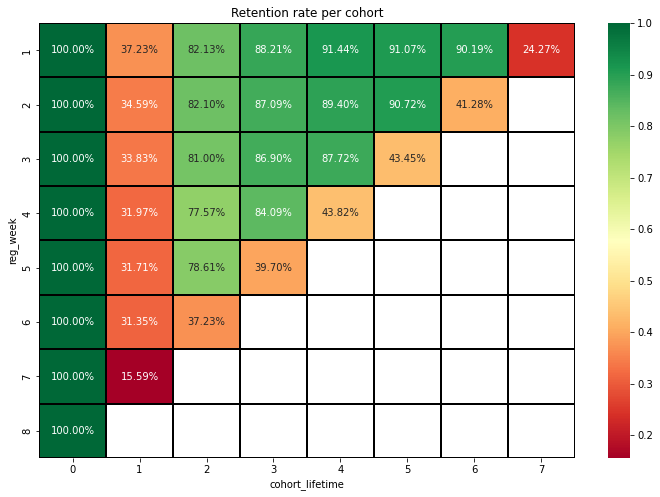

In [81]:
plt.figure(figsize=(12, 8))
plt.title('Retention rate per cohort')
sns.heatmap(retention, annot=True, cmap='RdYlGn',
            fmt='.2%', linewidths=1, linecolor='black');

In [82]:
df = df.merge(initial_users_count, how='left', on='reg_week')

In [83]:
df['cohort_revenue'] = df['revenue'] / df['cohort_users']

In [84]:
cohort_ltv = df.pivot_table(index='reg_week', columns='cohort_lifetime', values='cohort_revenue', aggfunc='sum') 

In [85]:
cohort_ltv = cohort_ltv.cumsum(axis=1)

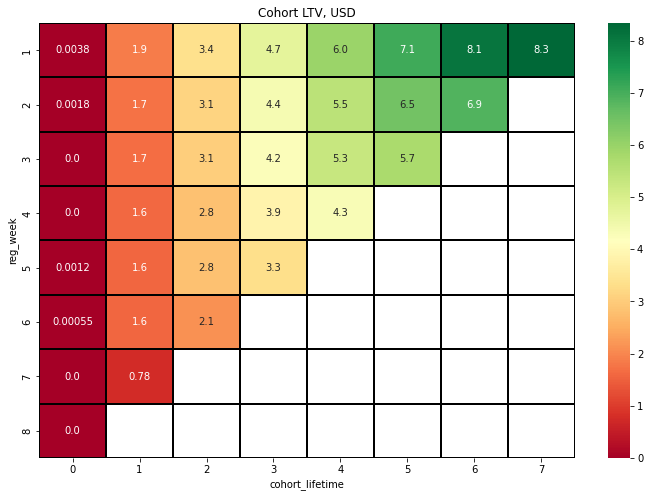

In [86]:
plt.figure(figsize=(12, 8))
plt.title('Cohort LTV, USD')
sns.heatmap(cohort_ltv, annot=True, cmap='RdYlGn',
            fmt='.2', linewidths=1, linecolor='black');

In [87]:
conversions = df.query('is_trial_period == False').groupby(['reg_week', 'cohort_lifetime'], as_index=False).agg({'user_id': 'nunique'})

In [88]:
conversions.columns = ['reg_week', 'cohort_lifetime', 'converted_users']

In [89]:
cohorts = cohorts.merge(conversions, how='left', on=['reg_week', 'cohort_lifetime'])

In [90]:
cohorts['conversion_rate'] = cohorts['converted_users'] / cohorts['cohort_users']

In [91]:
conversion = cohorts.pivot_table(index='reg_week', columns='cohort_lifetime', values='conversion_rate', aggfunc='sum') 

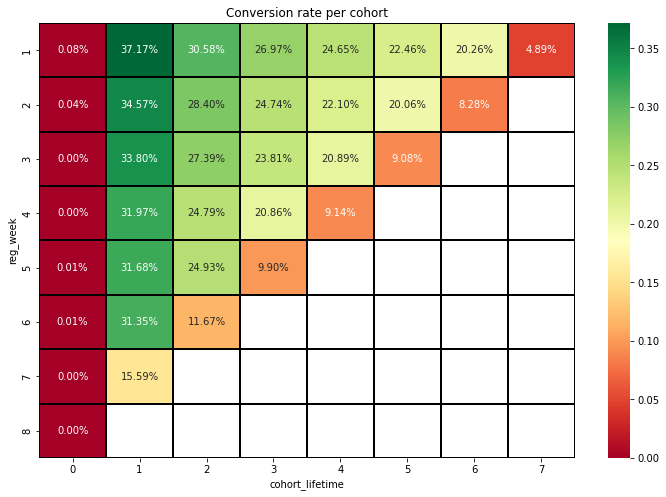

In [92]:
plt.figure(figsize=(12, 8))
plt.title('Conversion rate per cohort')
sns.heatmap(conversion, annot=True, cmap='RdYlGn',
            fmt='.2%', linewidths=1, linecolor='black');